<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [94]:
import pathlib
dataset_url = "file:///content/drive/MyDrive/archive.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='archive',
                                   untar=False)
archive = pathlib.Path(archive)

In [95]:
root_path = '/root/.keras/datasets/archive'
train_set = pd.read_csv(os.path.join(root_path, 'Train.csv'))
train_set = train_set[['ClassId', 'Path']]
train_set['Path'] = [os.path.join(root_path, str(x)) for x in train_set['Path']]
train_set

,ClassId,Path
0,20,/root/.keras/datasets/archive/Train/20/00020_0...
1,20,/root/.keras/datasets/archive/Train/20/00020_0...
2,20,/root/.keras/datasets/archive/Train/20/00020_0...
3,20,/root/.keras/datasets/archive/Train/20/00020_0...
4,20,/root/.keras/datasets/archive/Train/20/00020_0...
...,...,...
39204,42,/root/.keras/datasets/archive/Train/42/00042_0...
39205,42,/root/.keras/datasets/archive/Train/42/00042_0...
39206,42,/root/.keras/datasets/archive/Train/42/00042_0...
39207,42,/root/.keras/datasets/archive/Train/42/00042_0...


label 20


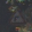

In [96]:
img = PIL.Image.open(str(train_set['Path'][1]))
label = train_set['ClassId'][1]
print('label %s' % label)
img.resize((32, 32))

In [97]:
batch_size = 32
img_height = 32
img_width = 32

In [98]:
train_set = tf.keras.utils.image_dataset_from_directory(
  '/root/.keras/datasets/archive/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [99]:
val_set = tf.keras.utils.image_dataset_from_directory(
  '/root/.keras/datasets/archive/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [100]:
class_names = train_set.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


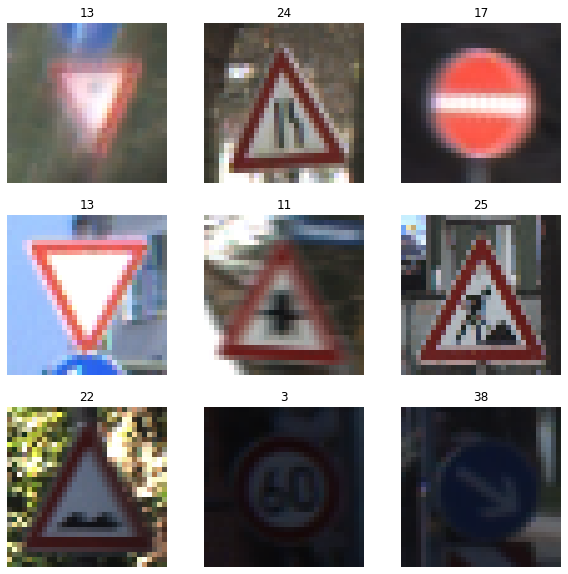

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [102]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 32, 32, 3)
(32,)


In [103]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [104]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

In [113]:
num_classes = 43

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [114]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_set,
  validation_data=val_set,
  epochs=3
)

Epoch 1/3
618/981 [=================>............] - ETA: 4:28 - loss: 2.2263 - accuracy: 0.3456